In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

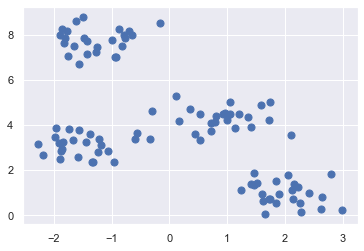

In [23]:
from sklearn.datasets import make_blobs

x,y_true=make_blobs(n_samples=100,centers=4,
                   cluster_std=0.5,random_state=0)
plt.scatter(x[:,0],x[:,1], s=50);

In [24]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
kmeans.fit(x)
y_kmeans=kmeans.predict(x)
y_kmeans

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([3, 1, 3, 3, 3, 3, 0, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 3, 1,
       0, 2, 3, 0, 0, 3, 2, 2, 2, 1, 2, 2, 0, 3, 1, 2, 1, 0, 3, 0, 1, 0,
       0, 1, 2, 0, 3, 3, 3, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 3, 2, 1,
       0, 0, 2, 3, 1, 2, 3, 1, 3, 3, 0, 0, 2, 2, 2, 1, 0, 3, 2, 0, 2, 2,
       3, 3, 3, 0, 3, 0, 0, 1, 1, 0, 1, 3])

#### Basic implementation of KMeans

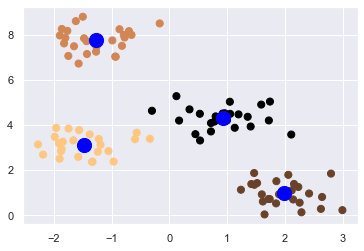

In [28]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(x, n_clusters, rseed=2):
    #1.Randomly chhose clusters
    rng=np.random.RandomState(rseed)
    i=rng.permutation(x.shape[0])[:n_clusters]
    centers=x[i]
    
    while True:
        #2.Assign labels based on closest cluster
        labels=pairwise_distances_argmin(x,centers)
        
        #3.Find new clusters from means of points
        new_centers=np.array([x[labels==i].mean(0)
                             for i in range(n_clusters)])
        
        #4.Check for convergence
        if np.all(centers==new_centers):
            break
        centers=new_centers
        
    return centers,labels

centers,labels=find_clusters(x,4)

plt.scatter(x[:,0],x[:,1], c=y_kmeans, s=50, cmap='copper_r')

plt.scatter(centers[:,0],centers[:,1],c='blue',s=200);